In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.drop('Unnamed: 0',axis=1,inplace = True)

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
#from above, it seems that minimum value of TV is very less as compared to all other values. it means it might be having outliers on the lower side.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


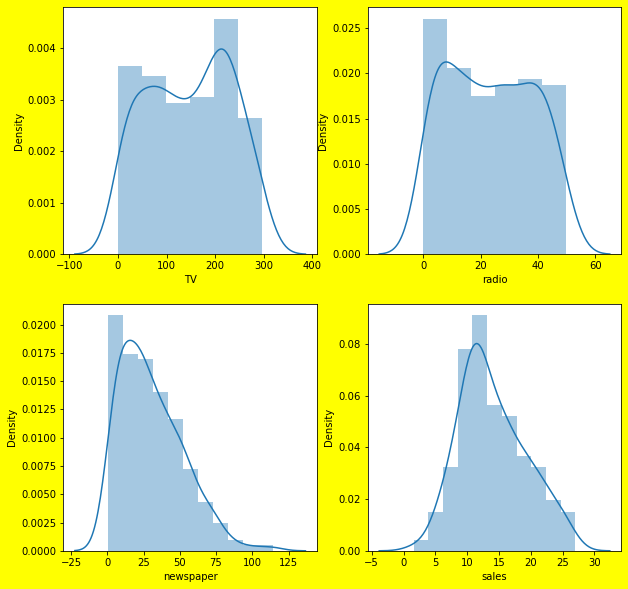

In [9]:
plotno=1
plt.figure(figsize=(10,10),facecolor='yellow')
for i in df:
    if plotno<5:
        plt.subplot(2,2,plotno)
        sns.distplot(df[i])
        plt.xlabel(i)
        plotno+=1
plt.show()

In [10]:
# some skewness in newspaper observed.

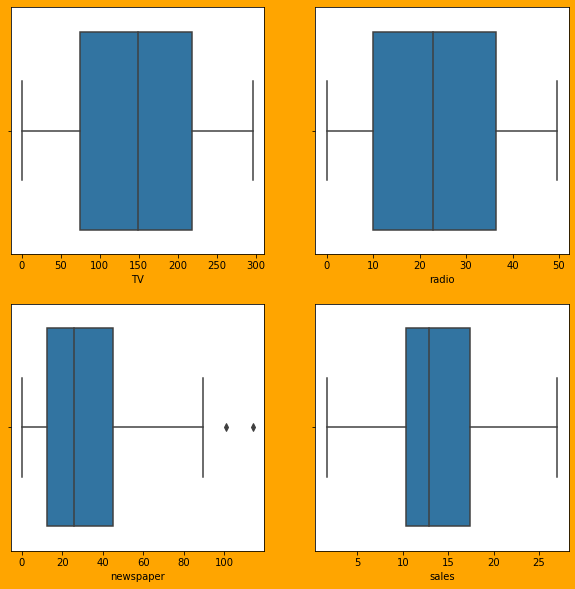

In [11]:
plotno=1
plt.figure(figsize=(10,10),facecolor='orange')
for i in df:
    if plotno<5:
        plt.subplot(2,2,plotno)
        sns.boxplot(df[i])
        plt.xlabel(i)
        plotno+=1
plt.show()

In [12]:
# newspaper has outliers

In [13]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [14]:
# skewness in newspaper confirmed.

In [15]:
from scipy.stats import zscore

In [16]:
ind=np.where(np.abs(zscore(df)>3))
df.drop(df.index[ind[0]],inplace = True)

In [17]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [18]:
(np.abs(zscore(df))>3).all()

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

In [19]:
#hence,outliers removed.

In [20]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [21]:
# power transformation is used for skewness removal.

In [22]:
from sklearn.preprocessing import PowerTransformer

In [23]:
pow= PowerTransformer(method='yeo-johnson')

In [24]:
x=df.drop('sales',axis=1)
y=df['sales']

In [25]:
x1=pow.fit_transform(x.values)

In [27]:
x_new=pd.DataFrame(x1)
x_new.columns=x.columns

In [28]:
x_new

,TV,radio,newspaper
0,0.955983,0.969110,1.604196
1,-1.192003,1.046234,0.831044
2,-1.646125,1.372968,1.607052
3,0.142934,1.147332,1.283768
4,0.456452,-0.735026,1.280622
...,...,...,...
193,-1.288311,-1.423941,-0.687435
194,-0.521579,-1.287689,-1.146090
195,0.416577,-0.862474,-1.314437
196,1.467535,1.182269,1.517395


In [29]:
x_new.skew()

TV          -0.320682
radio       -0.236668
newspaper   -0.101288
dtype: float64

In [30]:
#skewness removed.

In [31]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.049771,0.779121
radio,0.051978,1.000000,0.346364,0.576748
newspaper,0.049771,0.346364,1.000000,0.219555
sales,0.779121,0.576748,0.219555,1.000000


In [32]:
# let's check vif values.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif=pd.DataFrame({})
vif['vif']= [variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]
vif['columns']= x_new.columns

In [41]:
vif

,vif,columns
0,1.002693,TV
1,1.088710,radio
2,1.087940,newspaper


In [42]:
# it means no multicollinearity and hence, we can proceed with model development.

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x_new)

In [68]:
def random_state_check(x,y,algo):
    max_acc=0
    max_i=0
    for i in range(100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
        algo.fit(x_train,y_train)
        y_pred = algo.predict(x_test)
        score= r2_score(y_test,y_pred)
        if score>max_acc:
            max_acc= score
            max_i =i
        i+=1
    print(f"the maximum accuracy of algo {algo} at random_state {max_i} is {max_acc}")

In [52]:
lr = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
from sklearn.svm import SVR
svr = SVR()

In [56]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [61]:
x_scaled.shape

(198, 3)

In [66]:
y.reset_index(drop=True,inplace = True)
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
193     7.6
194     9.7
195    12.8
196    25.5
197    13.4
Name: sales, Length: 198, dtype: float64

In [69]:
random_state_check(x_scaled,y,lr)

the maximum accuracy of algo LinearRegression() at random_state 90 is 0.9473362332441401


In [70]:
random_state_check(x_scaled,y,rfr)

the maximum accuracy of algo RandomForestRegressor() at random_state 81 is 0.9886598191575908


In [71]:
random_state_check(x_scaled,y,dtr)

the maximum accuracy of algo DecisionTreeRegressor() at random_state 21 is 0.979700651052445


In [72]:
random_state_check(x_scaled,y,svr)

the maximum accuracy of algo SVR() at random_state 63 is 0.9746746104955114


In [74]:
# rfr seems to be best model yet at random_state 81.

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=81)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
r2_score(y_test,y_pred)

0.9877070828871761

In [77]:
# check for cross validation for overfitting check.

In [88]:
from sklearn.model_selection import cross_val_score

In [81]:
cvs = cross_val_score(rfr,x_scaled,y,scoring = 'r2',cv=5)

In [82]:
cvs

array([0.98152646, 0.98389256, 0.97523453, 0.96027855, 0.98121346])

In [83]:
# it means no overfitting.

In [85]:
# check for lasso regularization.

In [89]:
from sklearn.linear_model import Lasso,LassoCV

In [90]:
lass=Lasso()

In [91]:
def lasso_check(x_train,y_train,x_test,y_test):
    lasscv = LassoCV(alphas=[0.0001,0.005,0.08,0.7,1.0,12],max_iter = 100, normalize =True)
    lasscv.fit(x_train,y_train)
    alp=lasscv.alpha_
    lasso_reg =Lasso(alp)
    lasso_reg.fit(x_train,y_train)
    score = lasso_reg.score(x_test,y_test)
    print(f"lasso accuracy is {score}")


In [92]:
lasso_check(x_train,y_train,x_test,y_test)

lasso accuracy is 0.91886388034365


In [93]:
# let's check hyperparameter tuning by grid search

In [94]:
from sklearn.model_selection import GridSearchCV

In [96]:
params={'criterion':['squared_error','absolute_error'],'max_depth':[5,8,9,10],'min_samples_split':[3,4,5],'max_features':['sqrt','log2']}
grid=GridSearchCV(rfr, param_grid=params,cv=5)
grid.fit(x_train,y_train)
best_par=grid.best_params_
best_par

{'criterion': 'absolute_error',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 3}

In [103]:
rfr_new= RandomForestRegressor(criterion='absolute_error',max_depth=10,max_features='log2',min_samples_split=3)
rfr_new.fit(x_train,y_train)
y_pred= rfr_new.predict(x_test)
r2_score(y_test,y_pred)

0.9093592572808044

In [104]:
# it means hyperparameter tuning doesn't introduce significant improvement. so, we finalize the rfr with its default values.

In [105]:
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
r2_score(y_test,y_pred)

0.988028207589336

In [106]:
mean_absolute_error(y_test,y_pred)

0.4764749999999993

In [107]:
mean_squared_error(y_test,y_pred)

0.37230957499999945

In [108]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.6101717586057219

In [109]:
# to save the modelin pickle.

In [110]:
import pickle

In [111]:
filename ='Advertising_sales_channel_prediction_rfr'

In [112]:
pickle.dump(rfr,open('filename','wb'))

In [113]:
#conclusion:
#Random Forest Regressor with its default values and splitting of data at random state 81 is the best algo according to this project.

In [114]:
#hence, completed.